## Analysis of U.S. Refugee Data

The refugee data in this notebook comes from the [Department of State's Refugee Processing Center](https://www.wrapsnet.org/)'s [data portal](http://www.wrapsnet.org/Reports/InteractiveReporting/tabid/393/Default.aspx). It was retrieved on November 18, 2015.

## Load the data

In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sb
import itertools
%matplotlib inline

In [2]:
by_destination = pd.read_csv("../data/WRAPS-arrivals-by-destination-2005-2015-clean.csv")
by_religion = pd.read_csv("../data/WRAPS-arrivals-by-religion-2005-2015-clean.csv")

In [3]:
# The totals for the two data-reports are off by just four arrivals.
print(by_destination["arrivals"].sum())
print(by_religion["arrivals"].sum())

672518
672522


In [4]:
# Added by Steve, what if we break down total by country of origin?
kas_counts = by_destination.groupby('origin')['arrivals'].sum().to_frame('destination_count') \
   .join(by_religion.groupby('origin')['arrivals'].sum().to_frame('religion_count'))
kas_counts['discrep'] = kas_counts.destination_count - kas_counts.religion_count
kas_counts[kas_counts.discrep != 0]

,destination_count,religion_count,discrep
origin,,,
Iran,36683,36682,1
Iraq,127326,127331,-5


*Added by Steve*: *BuzzFeed News'* method above can be a problematic way to perform a sanity check.
It turns out that `by_destination` counted one more arrival from Iran and five less from Iraq than `by_religion`. Thus the different in the total is four. The sum of arrivals from both tables could be equal, yet drastic difference in the numbers reported could still lurk below the surface. But in this case, I'd say the quality of this data is still very good.

In [5]:
state_populations = pd.read_csv("../data/census-state-populations.csv").set_index("state")

In [6]:
# Added by Steve, so what does this data frame look like?
state_populations.head()

,pop_est_2014
state,
Alabama,4849377
Alaska,736732
Arizona,6731484
Arkansas,2966369
California,38802500


In [7]:
colors = itertools.cycle([ "#3498db","#2ecc71", "#9b59b6" ])

## Set up a few data-processing and chart-making functions

In [8]:
def arrivals_by_year(origin=None, dest_state=None, dest_city=None):
    return by_destination[
        (by_destination["origin"] == (origin if origin else by_destination["origin"])) &
        (by_destination["dest_state"] == (dest_state if dest_state else by_destination["dest_state"])) &
        (by_destination["dest_city"] == (dest_city if dest_city else by_destination["dest_city"]))
    ].groupby("year")["arrivals"].sum()

In [9]:
# Added by Steve
by_destination[by_destination['origin'] == 'Syria'].head()

,year,origin,dest_state,dest_city,arrivals
2948,2005,Syria,Arizona,Glendale,0
2949,2006,Syria,Arizona,Glendale,0
2950,2007,Syria,Arizona,Glendale,0
2951,2008,Syria,Arizona,Glendale,0
2952,2009,Syria,Arizona,Glendale,0


In [10]:
def make_vbar(series, title):
    ax = series.plot(kind="bar", width=0.85,
        figsize=(10, 6),
        fontsize=14,
        color=next(colors))
    ax.figure.set_facecolor("white")
    ax.set_ylim(0, series.max() * 1.05)
    ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ])
    mpl.pyplot.setp(ax.get_children()[len(series) + 1], alpha=0.5)
    mpl.pyplot.setp(ax.get_xticklabels(), rotation=0)
    ax.set_xlabel("")
    ax.set_title(title, fontsize=16, fontweight="bold", alpha=0.75)
    return ax

In [11]:
def make_hbar(series, title, width=9, height=20):
    ax = series.plot(kind="barh", width=0.75,
        figsize=(width, height),
        fontsize=14,
        color=next(colors))
    ax.figure.set_facecolor("white")
    ax.set_xlim(0, series.max() * 1.05)
    ax.set_xticklabels([ "{0:,.0f}".format(x) for x in ax.get_xticks() ])
    ax.invert_yaxis()
    ax.set_ylabel("")
    ax.set_title(title, fontsize=16, fontweight="bold", alpha=0.75)
    return ax

## Refugee arrivals by year

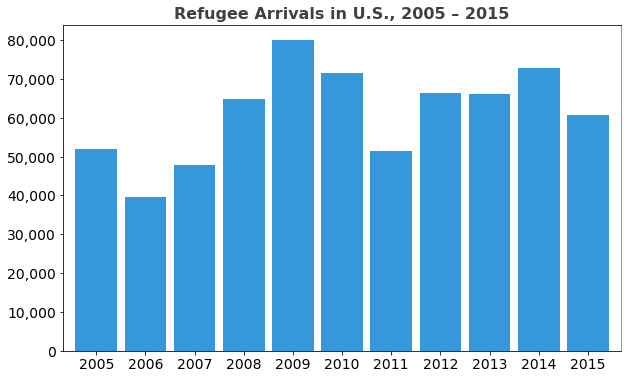

In [12]:
ax = make_vbar(arrivals_by_year(), "Refugee Arrivals in U.S., 2005 – 2015")
pass

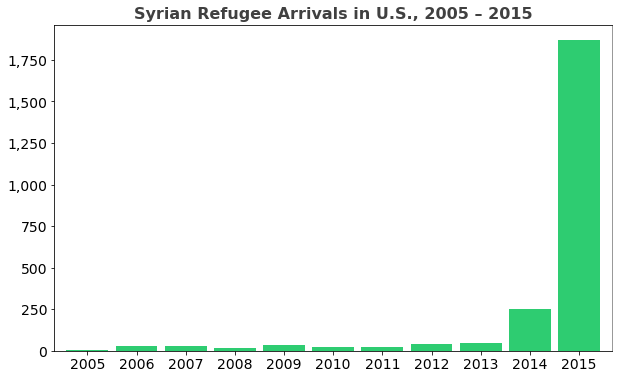

In [13]:
ax = make_vbar(arrivals_by_year(origin="Syria"), "Syrian Refugee Arrivals in U.S., 2005 – 2015")
pass

## Refugee arrivals by origin

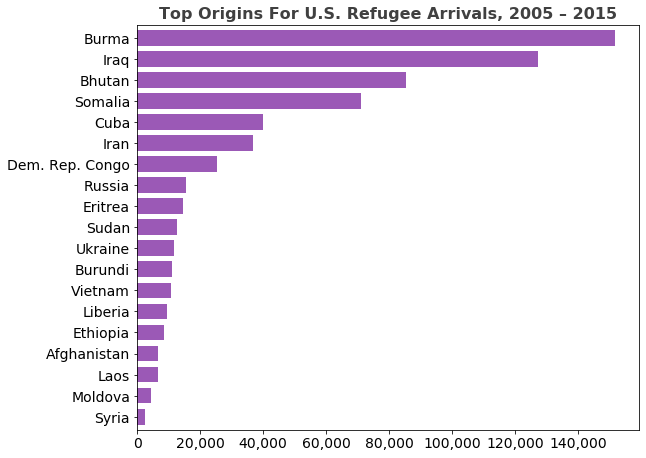

In [14]:
origin_counts = by_destination.groupby("origin")["arrivals"].sum()
ax = make_hbar(origin_counts.sort_values(ascending=False).head(19),
    "Top Origins For U.S. Refugee Arrivals, 2005 – 2015",
    height=(20 * 19 / 51))
pass

## Refugee arrivals by religion

In [15]:
by_religion.groupby("religion")["arrivals"].sum().sort_values(ascending=False)

religion
Christian                166421
Moslem                   117270
Moslem Suni               56752
Hindu                     52266
Catholic                  51353
Buddhist                  44522
Moslem Shiite             35131
Pentecostalist            23412
Baptist                   16606
No Religion               15072
Orthodox                  14486
Protestant                12864
Jehovah Witness           10009
Bahai                      8569
Kirat                      7413
Seventh Day Adventist      6901
Ancestral Worship          6773
Sabeans-Mandean            5424
Animist                    4910
Jewish                     3854
Methodist                  2821
Zoroastrian                2275
Evangelical Christian      2140
Other Religion             1094
Unknown                     913
Yazidi                      726
Lutheran                    543
Ahmadiyya                   488
Chaldean                    389
Uniate                      330
Atheist                     220

Note: The code below groups four separate designations — "Moslem," "Moslem Suni," "Moslem Shiite," and "Moslem Ismaici" (likely a typo for "Moslem Ismaili") — into a single "Muslim" grouping.

In [16]:
muslim_arrivals = by_religion[
    by_religion["religion"].str.contains("Moslem")
]

In [17]:
muslim_arrivals_by_year = muslim_arrivals.groupby("year")["arrivals"].sum()
muslim_arrivals_by_year

year
2005    19768
2006    17928
2007    11706
2008    15421
2009    17598
2010    19331
2011     8871
2012    19271
2013    25291
2014    30113
2015    23954
Name: arrivals, dtype: int64

In [18]:
print("Since 2005, about {0:.0f}% of arriving refugees have been Muslim.".format(
    muslim_arrivals["arrivals"].sum() * 100.0 / by_religion["arrivals"].sum())
)

Since 2005, about 31% of arriving refugees have been Muslim.


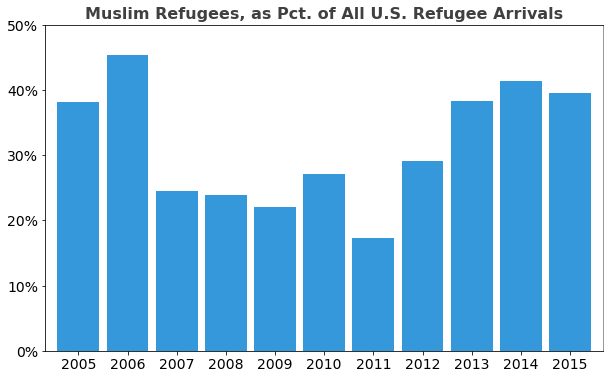

In [19]:
muslim_ratio = muslim_arrivals_by_year / by_religion.groupby("year")["arrivals"].sum()
ax = make_vbar(muslim_ratio, "Muslim Refugees, as Pct. of All U.S. Refugee Arrivals")
ax.set_yticklabels([ "{0:.0f}%".format(y * 100) for y in ax.get_yticks() ])
ax.set_ylim(0, 0.5)
pass

In [20]:
# Added by Steve
muslim_ratio

year
2005    0.380872
2006    0.453277
2007    0.245136
2008    0.238221
2009    0.220132
2010    0.270886
2011    0.172393
2012    0.290699
2013    0.382814
2014    0.413527
2015    0.395020
Name: arrivals, dtype: float64

In [21]:
muslim_origins = muslim_arrivals.groupby("origin")["arrivals"].sum()

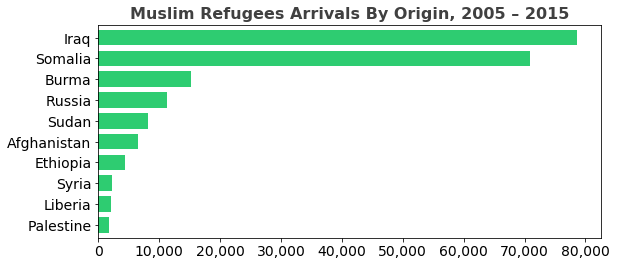

In [22]:
ax = make_hbar(muslim_origins.sort_values(ascending=False).head(10),
    "Muslim Refugees Arrivals By Origin, 2005 – 2015", height=10*20/51)

## Refugees by U.S. destination

In [23]:
large_single_populations = by_destination.groupby([ "origin", "dest_state", "dest_city" ])["arrivals"].sum()\
    .sort_values(ascending=False).head(15)

In [24]:
# Added by Steve
large_single_populations.head()

origin   dest_state  dest_city   
Iraq     California  El Cajon        11134
Iran     California  Glendale         9824
Cuba     Florida     Miami            8687
Burma    Indiana     Indianapolis     8413
Somalia  Minnesota   Minneapolis      5288
Name: arrivals, dtype: int64

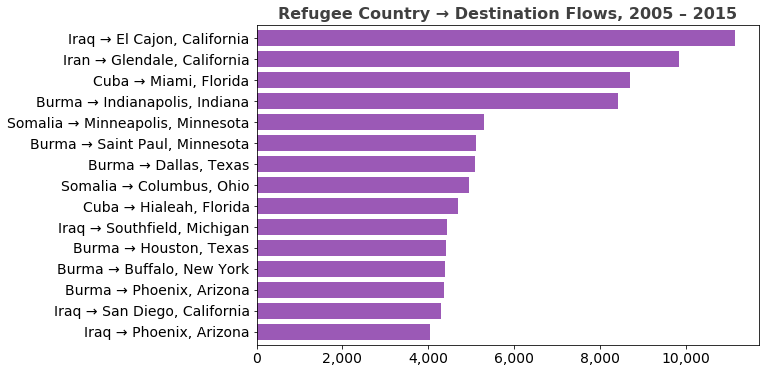

In [25]:
ax = make_hbar(large_single_populations, "Refugee Country → Destination Flows, 2005 – 2015", height=15*20/51)
ax.set_yticklabels([ "{0} → {2}, {1}".format(*y) for y in large_single_populations.index ])
pass

Note: State population data comes from the [Census Bureau's 2014 estimates](http://www.census.gov/popest/data/state/asrh/2014/index.html).

In [34]:
# Added by Steve
kas_1 = state_populations['pop_est_2014'].to_frame()
kas_1.head()

,pop_est_2014
state,
Alabama,4849377
Alaska,736732
Arizona,6731484
Arkansas,2966369
California,38802500


In [27]:
all_by_state = pd.DataFrame(state_populations["pop_est_2014"]).join(pd.DataFrame({
    "arrivals": by_destination.groupby("dest_state")["arrivals"].sum(),
})).fillna(0)
all_by_state["per_1k_residents"] = all_by_state["arrivals"] * 1000.0 / all_by_state["pop_est_2014"]
all_by_state.sort_values("per_1k_residents", ascending=False)

,pop_est_2014,arrivals,per_1k_residents
state,,,
North Dakota,739482,4457.0,6.027192
Idaho,1634464,9527.0,5.828822
South Dakota,853175,4703.0,5.512351
Minnesota,5457173,27259.0,4.995077
Vermont,626562,3110.0,4.963595
Arizona,6731484,29825.0,4.430672
Nebraska,1881503,8123.0,4.317293
Washington,7061530,27009.0,3.824809
Utah,2942902,10758.0,3.655575


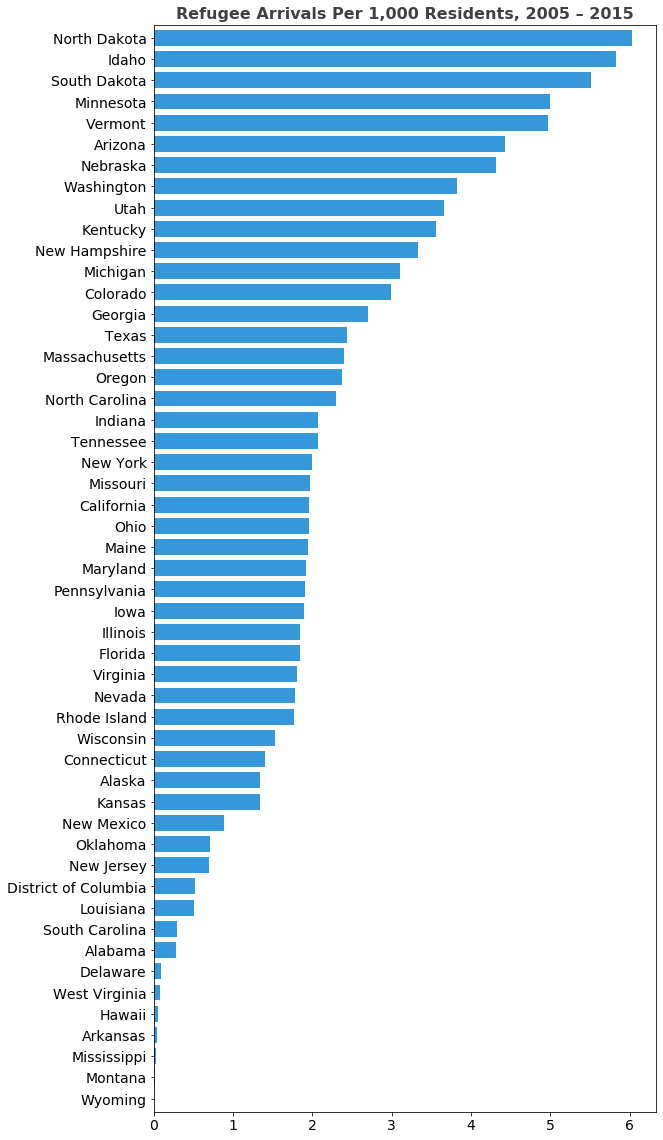

In [28]:
ax = make_hbar(all_by_state["per_1k_residents"].sort_values(ascending=False),
    "Refugee Arrivals Per 1,000 Residents, 2005 – 2015")
pass

In [48]:
# Added by Steve, This code performs an outer (left) join, 
# so were any states excluded from the joining? 
#
print('State total in population:', len(kas_1.index))
print('State total in population:', len(kas_2.index))
print('States in population but not in arrival keys: ', set(kas_1.index).difference(set(kas_2.index)))
print('States in arrivals but not in populations: ', set(kas_2.index).difference(set(kas_1.index)))

State total in population 51
State total in population 52
States in population but not in arrival keys:  {'Wyoming'}
States in arrivals but not in populations:  {'Guam', 'Puerto Rico'}


In [58]:
# Added by Steve, what if we added Puerto Rico and Guam to the results?
#
#
kas_populations = state_populations.copy()
kas_populations.loc['Puerto Rico', 'pop_est_2014'] = 3535000.0 # According to US Census Bureau
kas_populations.loc['Guam', 'pop_est_2014'] = 160967.0  # According to US Census Bureau

kas_all_by_state = pd.DataFrame(kas_populations["pop_est_2014"]).join(pd.DataFrame({
    "arrivals": by_destination.groupby("dest_state")["arrivals"].sum(),
})).fillna(0)

kas_all_by_state["per_1k_residents"] = kas_all_by_state["arrivals"] * 1000.0 / kas_all_by_state["pop_est_2014"]
kas_all_by_state.sort_values("per_1k_residents", ascending=False)

,pop_est_2014,arrivals,per_1k_residents
state,,,
North Dakota,739482.0,4457.0,6.027192
Idaho,1634464.0,9527.0,5.828822
South Dakota,853175.0,4703.0,5.512351
Minnesota,5457173.0,27259.0,4.995077
Vermont,626562.0,3110.0,4.963595
Arizona,6731484.0,29825.0,4.430672
Nebraska,1881503.0,8123.0,4.317293
Washington,7061530.0,27009.0,3.824809
Utah,2942902.0,10758.0,3.655575


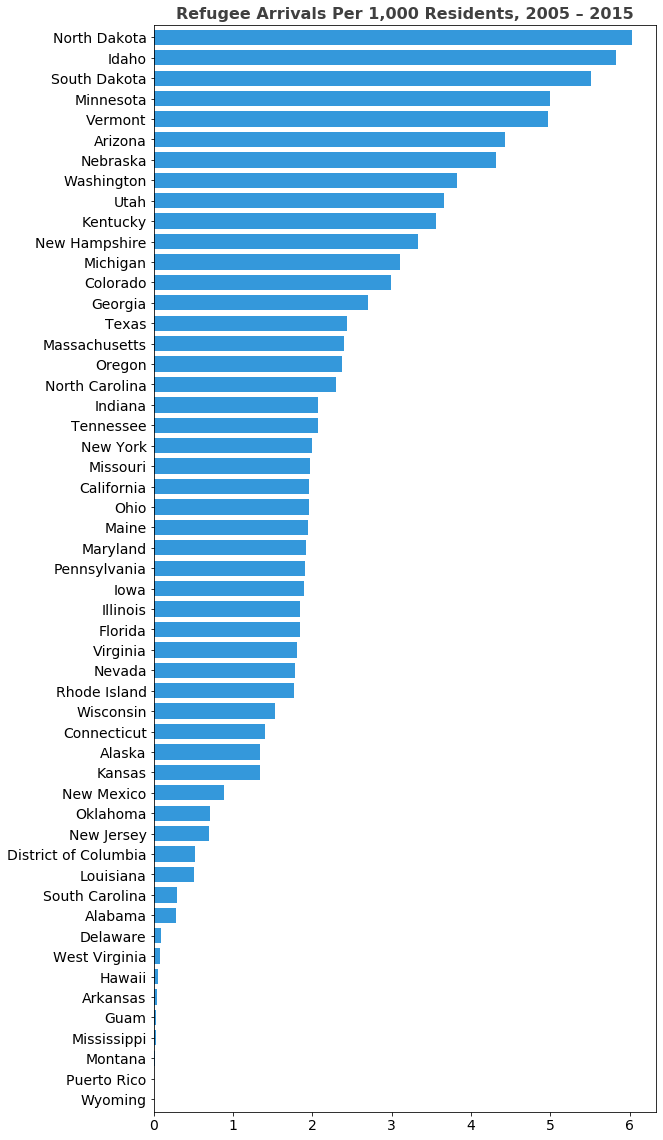

In [59]:
# Added by Steve
ax = make_hbar(kas_all_by_state["per_1k_residents"].sort_values(ascending=False),
    "Refugee Arrivals Per 1,000 Residents, 2005 – 2015")

---

---

---